In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('df_tratado.csv')

# Realizando o treinamento

In [3]:
x = df.drop(columns='Target')
x

,Idade na matrícula,Taxa de desemprego,Taxa de inflação,PIB,disciplinas 1º semestre (creditadas),disciplinas 1º semestre (matriculadas),disciplinas 1º semestre (avaliações),disciplinas 1º semestre (aprovadas),disciplinas 1º semestre (notas),disciplinas 1º semestre (sem avaliações),...,Qualificação prévia_Educação básica 3º ciclo (9º/10º/11º ano) ou equivalente,Qualificação prévia_Educação secundária,Qualificação prévia_Educação superior - bacharelado,Qualificação prévia_Educação superior - doutorado,Qualificação prévia_Educação superior - licenciatura,Qualificação prévia_Educação superior - licenciatura (1º ciclo),Qualificação prévia_Educação superior - mestrado,Qualificação prévia_Educação superior - mestrado (2º ciclo),Qualificação prévia_Frequência de educação superior,Qualificação prévia_Outro - 11º ano de escolaridade
0,20,10.8,1.4,1.74,0,0,0,0,0.000000,0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,19,13.9,-0.3,0.79,0,6,6,6,14.000000,0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,19,10.8,1.4,1.74,0,6,0,0,0.000000,0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,20,9.4,-0.8,-3.12,0,6,8,6,13.428571,0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,45,13.9,-0.3,0.79,0,6,9,5,12.333333,0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4419,19,15.5,2.8,-4.06,0,6,7,5,13.600000,0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4420,18,11.1,0.6,2.02,0,6,6,6,12.000000,0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4421,30,13.9,-0.3,0.79,0,7,8,7,14.912500,0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4422,20,9.4,-0.8,-3.12,0,5,5,5,13.800000,0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [4]:
y = df['Target']
y

0       Desistente
1         Graduado
2       Desistente
3         Graduado
4         Graduado
           ...    
4419      Graduado
4420    Desistente
4421    Desistente
4422      Graduado
4423      Graduado
Name: Target, Length: 4424, dtype: object

In [5]:
from sklearn.model_selection import train_test_split

In [10]:
x_split, x_test, y_split, y_test = train_test_split(x, y, test_size=.15, stratify=y, random_state=42)
x_train, x_valid, y_train, y_valid = train_test_split(x_split, y_split, stratify=y_split, random_state=42)

In [11]:
print(x_split.shape[0])
print(x_valid.shape[0])
print(x_test.shape[0])

3760
940
664


---

Sem hiperparâmetros

In [8]:
from sklearn.ensemble import RandomForestClassifier

0.9975177304964539
0.7851063829787234


In [ ]:
rfc_model = RandomForestClassifier(random_state=42)
rfc_model.fit(x_train, y_train)
y_predict = rfc_model.predict(x_valid)

In [ ]:
print(rfc_model.score(x_train, y_train))
print(rfc_model.score(x_valid, y_valid))

Com hiperparâmetros

In [13]:
rfc_model = RandomForestClassifier(random_state=42, max_depth=10)
rfc_model.fit(x_train, y_train)
y_predict = rfc_model.predict(x_valid)

print(rfc_model.score(x_train, y_train))
print(rfc_model.score(x_valid, y_valid))

0.8929078014184397
0.7914893617021277


# Avaliando o modelo

In [14]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

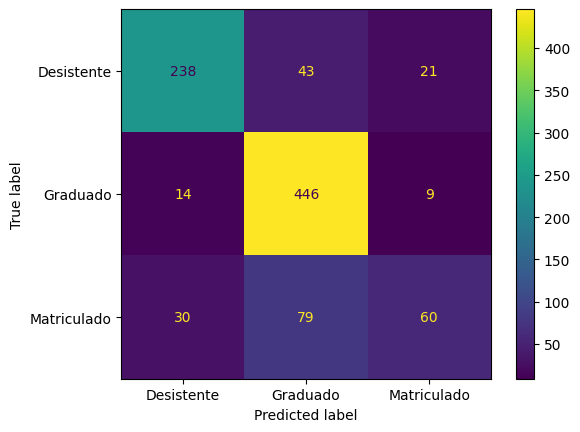

In [19]:
cm_graph = ConfusionMatrixDisplay(confusion_matrix(y_valid, y_predict), display_labels=rfc_model.classes_)
cm_graph.plot();

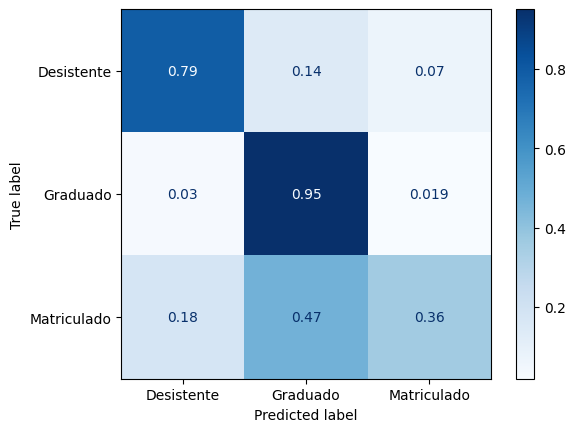

In [21]:
ConfusionMatrixDisplay.from_predictions(y_valid, y_predict, normalize='true', cmap='Blues')